In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/zomato_restaurants_in_India.csv")
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [ ]:
data = data.drop('rating_text', axis=1)

In [ ]:
data['cost_for_two'] = data['average_cost_for_two']

In [ ]:
data = data.drop('average_cost_for_two', axis=1)

In [ ]:
list(data.columns)

['res_id',
 'name',
 'establishment',
 'url',
 'address',
 'city',
 'city_id',
 'locality',
 'latitude',
 'longitude',
 'zipcode',
 'country_id',
 'locality_verbose',
 'cuisines',
 'timings',
 'price_range',
 'currency',
 'highlights',
 'aggregate_rating',
 'votes',
 'photo_count',
 'opentable_support',
 'delivery',
 'takeaway',
 'cost_for_two']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   res_id             211944 non-null  int64  
 1   name               211944 non-null  object 
 2   establishment      211944 non-null  object 
 3   url                211944 non-null  object 
 4   address            211810 non-null  object 
 5   city               211944 non-null  object 
 6   city_id            211944 non-null  int64  
 7   locality           211944 non-null  object 
 8   latitude           211944 non-null  float64
 9   longitude          211944 non-null  float64
 10  zipcode            48757 non-null   object 
 11  country_id         211944 non-null  int64  
 12  locality_verbose   211944 non-null  object 
 13  cuisines           210553 non-null  object 
 14  timings            208070 non-null  object 
 15  price_range        211944 non-null  int64  
 16  cu

In [ ]:
data.shape

(211944, 25)

In [ ]:
data['res_id'].nunique()

55568

In [ ]:
data.isnull().sum()

res_id                    0
name                      0
establishment             0
url                       0
address                 134
city                      0
city_id                   0
locality                  0
latitude                  0
longitude                 0
zipcode              163187
country_id                0
locality_verbose          0
cuisines               1391
timings                3874
price_range               0
currency                  0
highlights                0
aggregate_rating          0
votes                     0
photo_count               0
opentable_support        48
delivery                  0
takeaway                  0
cost_for_two              0
dtype: int64

In [ ]:
data['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [ ]:
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])

In [ ]:
data['establishment'].unique()[0]


'Quick Bites'

In [ ]:
# Replace empty strings with 'NA' in the "establishment" column
data['establishment'] = data['establishment'].replace('', 'NA')

In [ ]:
data.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,cost_for_two
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,814,154,0.0,-1,-1,700
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,1203,161,0.0,-1,-1,600
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,801,107,0.0,1,-1,300
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,693,157,0.0,1,-1,300
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,470,291,0.0,1,-1,1000
5,3400275,Domino's Pizza,Quick Bites,https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,707,62,0.0,-1,-1,400
6,3400296,Honeydew Restaurant,Quick Bites,https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,647,46,0.0,1,-1,500
7,3400368,Domino's Pizza,Quick Bites,https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,617,18,0.0,-1,-1,400
8,3401284,Cake House,Bakery,https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,322,14,0.0,1,-1,500
9,3400838,Sugar N Thyme,Café,https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,289,324,0.0,1,-1,1000


In [ ]:
data.tail(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,cost_for_two
211934,3200763,Swad,Quick Bites,https://www.zomato.com/vadodara/swad-karelibau...,"G-3, Status Complex, Opposite Amrapali Complex...",Vadodara,32,Karelibaug,22.320823,73.199167,...,1,Rs.,"['Dinner', 'Takeaway Available', 'Delivery', '...",4.0,365,9,0.0,-1,-1,200
211935,3201351,Mummys Pizza,Casual Dining,https://www.zomato.com/vadodara/mummys-pizza-d...,"Top Floor 323 - 327, Southwest Central Mall, D...",Vadodara,32,Diwalipura,22.280378,73.149108,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Lunc...",4.3,344,86,0.0,1,-1,500
211936,3202169,Red Dot Nation,Casual Dining,https://www.zomato.com/vadodara/red-dot-nation...,"Vinyak Heights, Beside Bharat Petrol Pump, Wag...",Vadodara,32,Suryanagar,22.281816,73.232252,...,2,Rs.,"['Cash', 'Delivery', 'Credit Card', 'Dinner', ...",3.6,381,19,0.0,-1,-1,600
211937,18855810,Biryani aur Baatein,Casual Dining,https://www.zomato.com/vadodara/biryani-aur-ba...,"Shop 14, Atlantis K-10, A Wing, Genda Circle R...",Vadodara,32,Alkapuri,22.317746,73.168043,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,154,96,0.0,-1,-1,500
211938,18662583,Wok On Fire,Casual Dining,https://www.zomato.com/vadodara/wok-on-fire-fa...,"Ground Floor 1, Rossette Building, Opposite Se...",Vadodara,32,Fatehgunj,22.323357,73.187461,...,3,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,301,126,0.0,1,-1,1000
211939,3202251,Kali Mirch Cafe And Restaurant,Casual Dining,https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,243,40,0.0,-1,-1,600
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,187,40,0.0,1,-1,300
211941,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,111,38,0.0,-1,-1,700
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,128,34,0.0,1,-1,500
211943,18879846,Freshco's - The Health Cafe,Café,https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,93,53,0.0,1,-1,600


In [ ]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,cost_for_two
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0,211944.000000
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0,595.812229
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0,606.239363
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0,0.000000
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0,250.000000
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0,400.000000
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0,700.000000
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0,30000.000000


In [ ]:
list[data.columns]

list[Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'price_range', 'currency',
       'highlights', 'aggregate_rating', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'takeaway', 'cost_for_two'],
      dtype='object')]

In [ ]:
data['locality'].nunique()

3731

In [ ]:
data['country_id'].nunique()

1

In [ ]:
data['locality_verbose'].nunique()

3910

In [ ]:
data['cuisines'].nunique()

9382

In [ ]:
data['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [ ]:
data['cuisines'].fillna('No cuisine', inplace=True)



In [ ]:
# Split the "cuisines" column by comma, strip whitespace, and concatenate into a single string
cuisine_list = data['cuisines'].str.split(', ').explode().str.strip()

# Get the total number of unique cuisines
total_unique_cuisines = cuisine_list.nunique()

# Print the total number of unique cuisines
print(f"Total number of unique cuisines: {total_unique_cuisines}")

Total number of unique cuisines: 134


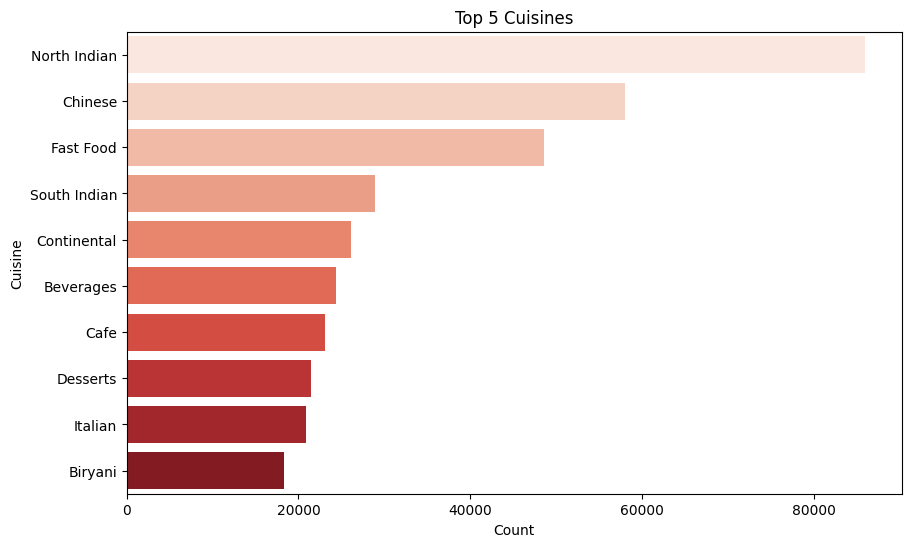

In [ ]:
# Assuming "cuisines" is a string column, split it into words
cuisines = data['cuisines'].str.split(', ')

# Flatten the list of lists into a single list of cuisines
all_cuisines = [cuisine for cuisine_list in cuisines for cuisine in cuisine_list]

# Create a Pandas Series to count cuisine occurrences
cuisine_counts = pd.Series(all_cuisines).value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

# Get the top 5 cuisines
top_5_cuisines = cuisine_counts.head(10)

# Define a custom red color palette
custom_palette = sns.color_palette("Reds", n_colors=10)

# Create a bar plot using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Cuisine', data=top_5_cuisines, palette=custom_palette)
plt.title('Top 5 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

In [ ]:
data['cost_for_two'].nunique()

145

In [ ]:
data['cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

In [ ]:
max_cost_row = data.loc[data['cost_for_two'] == data['cost_for_two'].max()]
max_cost_row

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,cost_for_two
136240,38489,Ocean - The Private Dining Room - Sahara Star,Fine Dining,https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,91,31,0.0,-1,-1,30000
136740,38489,Ocean - The Private Dining Room - Sahara Star,Fine Dining,https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,91,31,0.0,-1,-1,30000
137240,38489,Ocean - The Private Dining Room - Sahara Star,Fine Dining,https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,91,31,0.0,-1,-1,30000


In [ ]:
# Get the "name" of the restaurant with the maximum cost
restaurant_name = max_cost_row['name'][136240]

# Print the name of the restaurant
print(f"The restaurant with the maximum cost is: {restaurant_name}")

The restaurant with the maximum cost is: Ocean - The Private Dining Room - Sahara Star


<ipython-input-31-d69cebf81932>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['cost_for_two'], shade=True , color='red')


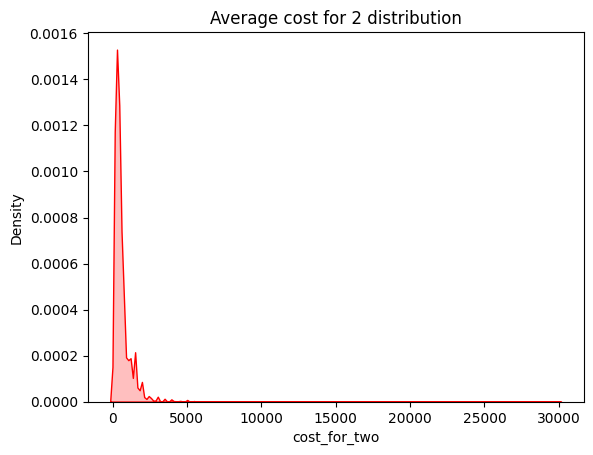

In [ ]:
sns.kdeplot(data['cost_for_two'], shade=True , color='red')
plt.title("Average cost for 2 distribution")
plt.show()

# Set Seaborn style to remove grid lines
sns.set_style("white")

<ipython-input-32-bd06929718d4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['cost_for_two'], shade=True, color='red')


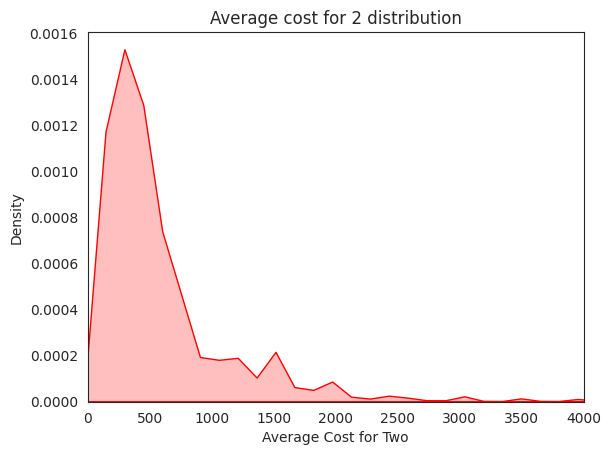

In [ ]:
sns.kdeplot(data=data['cost_for_two'], shade=True, color='red')

# Set the x-axis limits to the desired range
plt.xlim(0, 4000)

# Set the title and labels
plt.title("Average cost for 2 distribution")
plt.xlabel("Average Cost for Two")
plt.ylabel("Density")

# Show the plot
plt.show()


In [ ]:
outlets = data["name"].value_counts()
outlets

Domino's Pizza           3108
KFC                      1343
Cafe Coffee Day          1068
Pizza Hut                 936
Subway                    766
                         ... 
Night Rocket                1
Daughter's Cook House       1
Punjabi Flavours            1
Majlis  E Mughal            1
Geeta lodge                 1
Name: name, Length: 41100, dtype: int64

In [ ]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [ ]:
data.shape

(211944, 25)

In [ ]:
chains

Domino's Pizza                      3108
KFC                                 1343
Cafe Coffee Day                     1068
Pizza Hut                            936
Subway                               766
                                    ... 
Apna Cafe                              2
Quality Cool Cafe And Cold Drink       2
Shake Valley                           2
Cake Room                              2
Honey Confectionery                    2
Name: name, Length: 24506, dtype: int64

In [ ]:
single

Omm Sairam Restaurant        1
Mitha & Pitha                1
Trimurti Rajputana Lodge     1
Kuro - Renaissance Hotel     1
Atmaram's Sweets & Snacks    1
                            ..
Night Rocket                 1
Daughter's Cook House        1
Punjabi Flavours             1
Majlis  E Mughal             1
Geeta lodge                  1
Name: name, Length: 16594, dtype: int64

In [ ]:
# Identify cities with the highest concentration of restaurants
city_restaurant_counts = data['city'].value_counts()
city_restaurant_counts

Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: city, Length: 99, dtype: int64

In [ ]:
# Select the top 10 cities with the most restaurants
top_10_cities = city_restaurant_counts[:10]

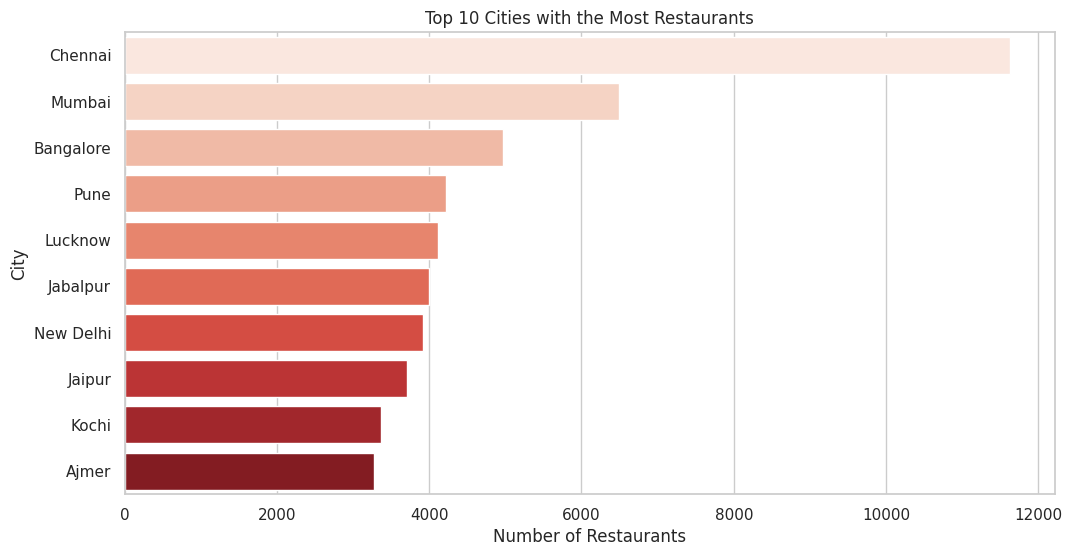

In [ ]:
# Set up the plotting style (optional)
sns.set(style="whitegrid")

# Define a custom red color palette
custom_palette = sns.color_palette("Reds", n_colors=10)

# Create a count plot for the top 10 cities using Seaborn with the custom red palette
plt.figure(figsize=(12, 6))

# Assuming you have 'data' and 'top_10_cities' correctly defined, you can use them as follows:
sns.countplot(y=data['city'], order=data['city'].value_counts().iloc[:10].index, palette=custom_palette)

# Set the axis labels and title
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Restaurants")

# Display the plot
plt.show()

In [ ]:
# Determine cities with the highest and lowest average costs for two people
city_avg_cost = data.groupby('city')['cost_for_two'].mean().sort_values()

In [ ]:
# Display the cities with the highest and lowest average costs
print("\nCities with the highest average cost for two people:")
print(city_avg_cost.tail())


Cities with the highest average cost for two people:
city
Pune          979.858904
Bangalore    1036.187890
Gurgaon      1333.906977
New Delhi    1379.698826
Mumbai       1388.994921
Name: cost_for_two, dtype: float64


In [ ]:
print("\nCities with the lowest average cost for two people:")
print(city_avg_cost.head())


Cities with the lowest average cost for two people:
city
Junagadh     179.705882
Jamnagar     229.330522
Amravati     238.644708
Kharagpur    267.900763
Jhansi       271.786340
Name: cost_for_two, dtype: float64


In [ ]:
# Identify popular restaurant chains
popular_chains = data['name'].value_counts()[:10]
# Display the results
print("Popular Restaurant Chains:")
print(popular_chains)

Popular Restaurant Chains:
Domino's Pizza        3108
KFC                   1343
Cafe Coffee Day       1068
Pizza Hut              936
Subway                 766
Barbeque Nation        725
Burger King            658
McDonald's             578
Keventers              512
The Chocolate Room     461
Name: name, dtype: int64


In [ ]:
# Set up the plotting style (optional)
sns.set(style="whitegrid")

# Define a custom red color palette
custom_palette = sns.color_palette("Reds", n_colors=len(top_establishments))


# Create a bar graph using Seaborn with the custom yellow palette
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_chains.values, y=popular_chains.index, palette=custom_palette)

# Set the axis labels and title
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Popular Restaurant Chains")

# Display the plot
plt.show()

NameError: ignored

In [ ]:
list[data.columns]

In [ ]:
# Explore the average ratings and customer reviews for popular chains
popular_chains_ratings = data[data['name'].isin(popular_chains.index)].groupby('name')['aggregate_rating'].mean()
popular_chains_ratings

In [ ]:
# Set up the plotting style (optional)
sns.set(style="whitegrid")

# Define a custom red color palette
custom_palette = sns.color_palette("Reds", n_colors=len(top_establishments))

# Create a bar graph using Seaborn with the custom blue palette
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_chains_ratings.values, y=popular_chains_ratings.index, palette=custom_palette)

# Set the axis labels and title
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.title("Average Ratings for Top 10 Popular Restaurant Chains")

# Display the plot
plt.show()

In [ ]:
list[data.columns]

In [ ]:
data.isnull().sum()

In [ ]:
data["highlights"].nunique()

In [ ]:
data["highlights"].unique()

In [ ]:
# Find the top 5 establishments
top_establishments = data['establishment'].value_counts().head(5)

# Set up the plotting style (optional)
sns.set(style="whitegrid")

# Define a custom red color palette
custom_palette = sns.color_palette("Reds", n_colors=len(top_establishments))


# Create a vertical bar graph using Seaborn with the custom blue palette
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x=top_establishments.index, y=top_establishments.values, palette=custom_palette)

# Set the axis labels and title
plt.xlabel("Establishment Type")
plt.ylabel("Number of Restaurants")
plt.title("Top 5 Establishments")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


In [ ]:
sns.kdeplot(data['aggregate_rating'], shade=True ,color= 'red')
plt.title("Ratings distribution")
plt.show()

# Set Seaborn style to remove grid lines
sns.set_style("white")

In [ ]:
price_count = data.groupby("price_range").count()["name"]
price_count

In [ ]:
# Define a custom red color palette
custom_palette = sns.color_palette("Reds", n_colors=len(price_count))

# Create a bar graph with red colors
plt.figure(figsize=(10, 6))
ax = price_count.plot(kind='bar', color=custom_palette)

# Set the axis labels and title
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants by Price Range")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [ ]:
data.to_csv('/content/zomato.csv',index=False)

In [ ]:
# !pip install pyspark

from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("MySparkSession").getOrCreate()

In [ ]:
data = spark.read.csv("/content/zomato.csv", header=True, inferSchema=True)

In [ ]:
data.createOrReplaceTempView("zomato_table")

In [ ]:
list(data.columns)

In [ ]:
query1 = spark.sql("""
    SELECT city, COUNT(*) AS restaurant_count
    FROM zomato_table
    GROUP BY city
    ORDER BY restaurant_count DESC
    LIMIT 10
""")

query1.show()

In [ ]:
query2 = spark.sql("""
    SELECT city,name, photo_count
    FROM zomato_table
    WHERE photo_count >= 50
    GROUP BY city,name, photo_count
    LIMIT 10
""")

query2.show()

In [ ]:
query3 = spark.sql("""
    SELECT establishment, COUNT(*) AS restaurant_count
    FROM zomato_table
    GROUP BY establishment
    ORDER BY restaurant_count DESC
    LIMIT 5
""")
query3.show()

In [ ]:
query4 = spark.sql("""
    SELECT cuisines, COUNT(*) AS restaurant_count
    FROM zomato_table
    GROUP BY cuisines
    ORDER BY restaurant_count DESC
    LIMIT 5
""")
query4.show()

In [ ]:
query5 = spark.sql("""
SELECT city, AVG(cost_for_two) AS avg_cost_for_two
FROM zomato_table
GROUP BY city
ORDER BY avg_cost_for_two DESC
LIMIT 5
""")
query5.show()


In [ ]:
# here, LIMIT 10 OFFSET 11 matlab ki 10 values chahiye 11th index se

query6 = spark.sql("""
SELECT name, aggregate_rating
FROM zomato_table
GROUP BY name, aggregate_rating
ORDER BY aggregate_rating DESC
LIMIT 10 OFFSET 11
""")
query6.show()